In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm

import warnings

#Trick for plotting inlines in Jupyter Notebook
%matplotlib inline

#ignoring warnings
warnings.filterwarnings("ignore")

In [2]:
def show_some_sample_images(dataset,k=5):
    sample = dataset.sample(n=k)
    for index in range(k):
        img = sample.iloc[index].as_matrix()
        img = img.reshape((28,28))
        plt.figure(figsize=(20,2))
        plt.grid(False)
        plt.axis('off')
        plt.xticks([])
        plt.yticks([])
        plt.imshow(img)
        plt.show()
        

In [3]:
data = pd.read_csv('train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
labels = data.iloc[0:10000, :1]
images = data.iloc[0:10000, 1:]

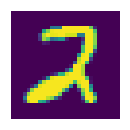

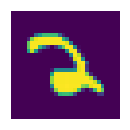

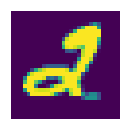

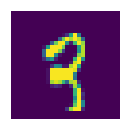

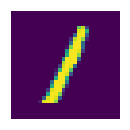

In [5]:
show_some_sample_images(images)

In [6]:
train_images, test_images, train_labels, test_labels=train_test_split(images, labels, train_size=0.8, random_state=0)

In [7]:
clf = svm.SVC(kernel='linear')
clf = clf.fit(train_images, train_labels.values.ravel())

In [8]:
print(clf.score(test_images, test_labels))

0.9145


In [ ]:
test_data=pd.read_csv('test.csv')
results = clf.predict(test_data)

test_data['Label'] = pd.Series(results)
test_data['ImageId'] = test_data.index +1
sub = test_data[['ImageId','Label']]

sub.to_csv('submission.csv')
                     
                  